In [74]:
import numpy as np
import math
from IPython.core.debugger import set_trace
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
import copy
import random

lowerBound, upperBound = -30, 30
x = np.random.uniform(low=lowerBound, high=upperBound, size=(10,))
N = len(x)


def f(x):
    #Sphere
    # x in interval [-30, -30]
    #Sum = 0
    #for i in range(0,N):
    #    Sum = Sum + (x[i])**2

    #Rosenbrock
    #za epsilon = 10e-30 dao nulu
    # x in interval [-30, -30]
    #Sum = 0
    #for i in range(0, N-1):
    #    Sum = Sum + 100 * ((x[i])**2 - x[i+1])**2 + (x[i] - 1)**2
        
    #Ackley
    # x in interval [-5, -10]
    Sum1, Sum2 = 0, 0
    for i in range(0,N):
        Sum1 = Sum1 + (x[i])**2
        Sum2 = Sum2 + math.cos(2*math.pi*x[i])
    Sum= -20.0*math.exp(-0.2*math.sqrt((1/N)*(Sum1)))-math.exp((1/N) * Sum2) + math.e + 20
    return Sum

l = [lowerBound for i in range(10)]
u = [upperBound for i in range(10)]
def _e(index,size):
    arr = np.zeros(size)
    arr[index] = 1.0
    return arr
def Delta(x):
    Sum = 0
    #no general, only box constraints
    for i in range(0,N):
        Sum = Sum + max(x[i]-u[i],0) + max(l[i]-x[i], 0)
    return Sum
def better(x,y):
    Dx = Delta(x)
    Dy = Delta(y)
    if(Dx < Dy):
        return True
    elif(Dx == Dy and f(x) < f(y)):
        return True
    else:
        return False
def findExtremes(s):
    Ds = np.empty([N+1])
    fs = np.empty([N+1])
    
    for i in range(0, N+1):
        Ds[i] = Delta(s[i])
        fs[i] = f(s[i])
    
    arg_b = np.argmin(Ds)
    for i in range(0, N+1):
        if Ds[i] == Ds[arg_b] and i != arg_b:
            if(fs[i] < fs[arg_b]):
                arg_b = i;
                
    arg_w = np.argmax(Ds)
    for i in range(0, N+1):
        if Ds[i] == Ds[arg_w] and i != arg_w:
            if(fs[i] > fs[arg_w]):
                arg_w = i;
    
    #mask the worst to find the second worst
    Ds[arg_w] = 0
    
    arg_sw = np.argmax(Ds)
    for i in range(0, N+1):
        if Ds[i] == Ds[arg_sw] and i != arg_w:
            if(fs[i] > fs[arg_sw]):
                arg_sw = i;
    
    return arg_b,arg_w,arg_sw
def centroid(s,argWorst):
    return np.mean(np.delete(s, argWorst), axis = 0)
def SimplexLocalSearch(n_iterations,x,Epsilon,Lambda,Alpha=1,Gamma=2,Beta=-0.5):
    N = len(x)
    s = np.empty([N+1,N])
    s[0] = x
    for j in range(1,N+1):
        s[j] = x + Lambda*(u[j-1]-l[j-1])*_e(j-1,N);
    k = 0
    
    
    argBest, argWorst, argSecondWorst = findExtremes(s)
    sBest, sWorst, sSecondWorst = s[argBest], s[argWorst], s[argSecondWorst]
    #set_trace()
    while abs(f(sBest) - f(sWorst)) > Epsilon and k < n_iterations:
        #set_trace()
        #if(k%1000 == 0):print(f(sBest),'\n')
        r = (1+Alpha)*centroid(s,argWorst) - Alpha*sWorst
        if(better(sBest,r) and better(r,sSecondWorst)):
            s[argWorst] = r
        elif(better(r,sBest)):
            e = (1+Gamma)*centroid(s,argWorst)-Gamma*sWorst
            if(better(e,r)):
                s[argWorst] = e
            else:
                s[argWorst] = r
        else:
            c = (1+Beta)*centroid(s,argWorst)-Beta*sWorst
            if(better(c,sWorst)):
                s[argWorst] = c
            else:
                for j in range(0,N+1):
                    s[j] = (s[j] + sBest)/2

        #set_trace()
        argBest, argWorst, argSecondWorst = findExtremes(s)
        sBest, sWorst, sSecondWorst = s[argBest], s[argWorst], s[argSecondWorst]
        k = k + 1
    #print(f(sBest))
    return sBest


def SimulatedAnnealing(n_iterations, Epsilon, Lambda, Temperature):
    # generate an initial point
    best = np.random.uniform(low=lowerBound, high=upperBound, size=(10,))
    # evaluate the initial point
    best_eval = f(best)
    # current working solution
    curr, curr_eval = best, best_eval
    scores = list()
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        candidate = SimplexLocalSearch(best,Epsilon,Lambda)
        #set_trace()
        # evaluate candidate point
        candidate_eval = f(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            # keep track of scores
            scores.append(best_eval)
            # report progress
            print('>%d f(%s) = %f' % (i, best, best_eval))
        # difference between candidate and current point evaluation
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = Temperature / float(i + 1)
        # calculate metropolis acceptance criterion
        metropolis = exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, scores]

def SimulatedAnnealing(Epsilon, Lambda, T_max = N*10, T_min=0, beta=1, mu=3, nu=1, tau = 1.001, 
                       alpha = 0.999):
    # generate an initial point
    x_0 = np.random.uniform(low=lowerBound, high=upperBound, size=(10,))
    
    scores = list()
    
    x = copy.copy(x_0)
    scores.append(x_0)
    T = T_max
    
    #radius
    z_max = (upperBound - lowerBound)/2
    z_min = (upperBound - lowerBound)/50
    z_0 = (z_max + z_min)/2
    z = z_0
    
    #maximum number of iterations for nelder-mead
    N_max = 500 * N
    

    
    while(T > T_min):
        k = 0
        print(T)
        while(k <= mu):
            #generate neighborhood trail solutions
            l = list()
            for i in range(0,N):
                start = random.randint(0, N/nu-1)
                y = copy.copy(x)
                for j in range(0,nu):
                    y[start*nu+j] = np.random.uniform(low = y[start*nu+j]-z,
                                                      high = y[start*nu+j]+z,
                                                      size = (1,) )
                l.append(y)
            
            #find best y
            x_apostrophe = copy.copy(l[0])
            for i in range(1,N):
                if(f(l[i]) < f(x_apostrophe)):
                    x_apostrophe = copy.copy(l[i])
            
            
            delta_E = f(x_apostrophe) - f(scores[-1])
            
            if delta_E < 0:#better solution is always selected
                x = copy.copy(SimplexLocalSearch(2000,x_apostrophe,Epsilon,Lambda))
                scores.append(x)
                z = tau * z
                #if(z_max < z):
                #    z_max = z
            else:
                z = alpha * z
                #if(z_min > z):
                #    z_min = z
                if(rand() < exp(-delta_E / T)):#worse solution likely selected 
                                               #with higher temperature
                    #x_apostrophe = copy.copy(SimplexLocalSearch(100,x,Epsilon,Lambda))
                    #print(np.linalg.norm(x_apostrophe-scores[-1]))
                    #print(z)
                    scores.append(x_apostrophe)
                    x = copy.copy(x_apostrophe)
            k = k + 1
        T = T - beta
    
    #apply nelder-mead at best solution
    minimum = x
    for i in range(0,len(scores)):
        if(f(scores[i]) < f(minimum)):
            minimum = copy.copy(x)
    
    x = SimplexLocalSearch(N_max,minimum,Epsilon,Lambda)
    scores.append(x)
    
    evaluations = list()
    for i in range(0,len(scores)):
        evaluations.append(f(scores[i]))
    return [x, f(x), evaluations]

100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
Done!
f([ 5.02305973e-17  4.11886471e-15  5.02305973e-17  8.68297878e-17
  5.02305973e-17  5.02305973e-17  5.02305973e-17  5.02305973e-17
 -8.80258286e-17 -1.35700887e-16]) = 3.552713678800501e-15


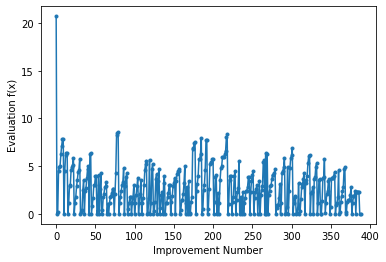

In [75]:
Lambda = 10
Epsilon = 0

# perform the simulated annealing search
best, score, scores = SimulatedAnnealing(Epsilon,Lambda)
print('Done!')
print('f(%s) = %s' % (best, score))
# line plot of best scores
pyplot.plot(scores[:], '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

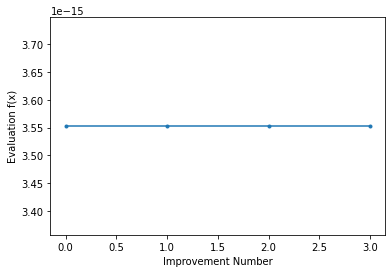

In [57]:
pyplot.plot(scores[1:5], '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()

In [12]:
for i in range(10):
    print(rand())

0.6164444369463788
0.5151129389535948
0.2806023109040664
0.2455911571210332
0.9546624870790357
0.7226496114115025
0.2895598633597627
0.131057477821089
0.7354149328364562
0.10145553516494599
